In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 년도별 평균 대기오염도 정보\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 년도별 평균 대기오염도 정보\\서울시 년도별 평균 대기오염도 정보.csv']

In [5]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,측정년도,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2023,강남구,0.036,0.015,0.7,0.004,62.0,40.0
1,2023,강남대로,0.039,0.010,0.9,0.004,66.0,44.0
2,2023,강동구,0.030,0.012,0.7,0.003,68.0,47.0
3,2023,강변북로,0.042,0.010,0.9,0.003,64.0,46.0
4,2023,강북구,0.029,0.019,0.7,0.003,67.0,37.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정년도          1228 non-null   int64  
 1   측정소명          1228 non-null   object 
 2   이산화질소농도(ppm)  1197 non-null   float64
 3   오존농도(ppm)     1182 non-null   float64
 4   일산화탄소농도(ppm)  1196 non-null   float64
 5   아황산가스(ppm)    1180 non-null   float64
 6   미세먼지(㎍/㎥)     1040 non-null   float64
 7   초미세먼지(㎍/㎥)    518 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 76.9+ KB


In [6]:
df.describe()

,측정년도,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,1228.000000,1197.000000,1182.000000,1196.000000,1180.000000,1040.000000,518.000000
mean,2008.709283,0.036151,0.017978,0.847324,0.008653,53.595192,25.250965
std,9.613612,0.011449,0.006492,0.620421,0.012925,17.340406,6.587512
min,1987.000000,0.009000,0.002000,0.100000,0.002000,0.000000,14.000000
25%,2001.000000,0.030000,0.013000,0.500000,0.004000,43.000000,21.000000
50%,2010.000000,0.034000,0.017000,0.600000,0.005000,52.000000,24.000000
75%,2017.000000,0.040000,0.022000,0.825000,0.007000,63.000000,27.000000
max,2023.000000,0.105000,0.088000,5.400000,0.121000,399.000000,49.000000


In [7]:
df.describe(include=np.object)

,측정소명
count,1228
unique,53
top,광진구
freq,37


In [8]:
df.isnull().sum()

측정년도              0
측정소명              0
이산화질소농도(ppm)     31
오존농도(ppm)        46
일산화탄소농도(ppm)     32
아황산가스(ppm)       48
미세먼지(㎍/㎥)       188
초미세먼지(㎍/㎥)      710
dtype: int64

In [6]:
df.fillna(0,inplace=True)

**각 오염물질 농도 분포는?**

**연도별 오염물질 추세는?**

**5년 단위로 오염물질이 가장 높은 측정소 top 5**

## 시각화

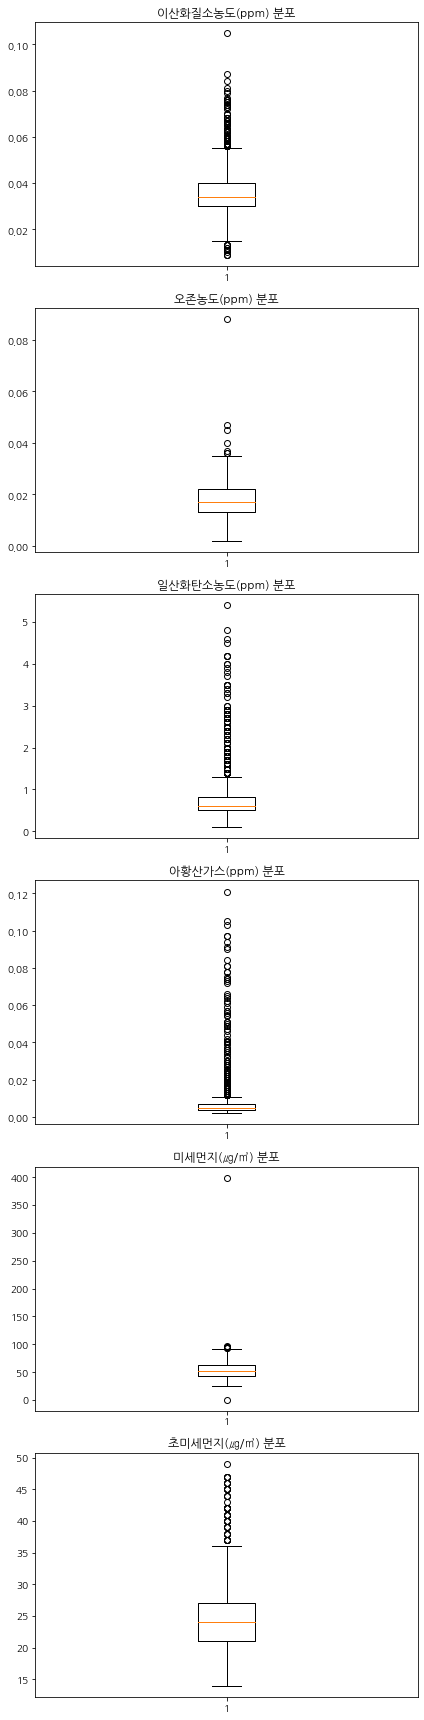

In [12]:
air_cols = df.columns[2:]
fig,axes = plt.subplots(6,1,figsize=(6,24))
for i,c in enumerate(air_cols):
    axes[i].boxplot(data=df[df[c]>0][[c]],x=c)
    axes[i].set_title(f'{c} 분포')
plt.tight_layout()

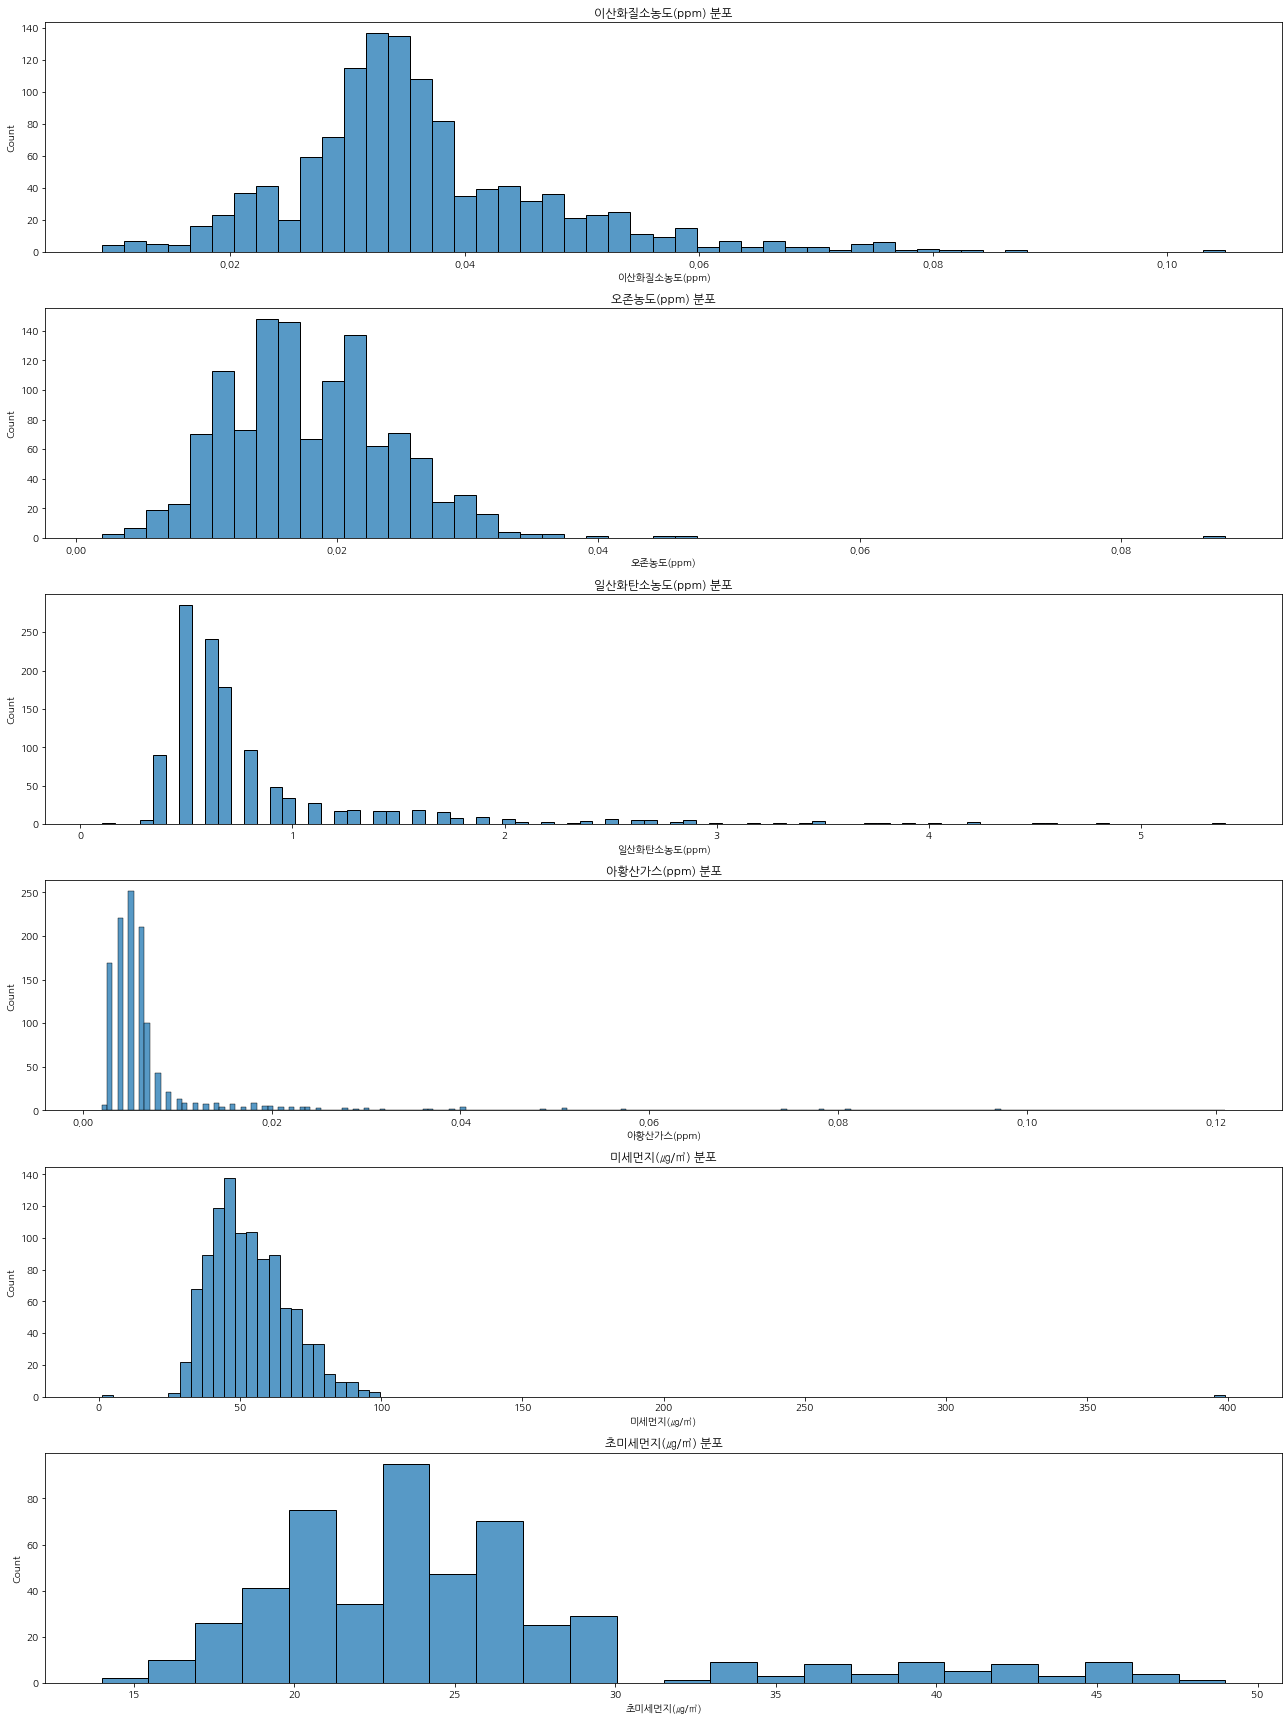

In [23]:
air_cols = df.columns[2:]
fig,axes = plt.subplots(6,1,figsize=(18,24))
for i,c in enumerate(air_cols):
    sns.histplot(data=df[df[c]>0][[c]],x=c,ax=axes[i]).set(title=f'{c} 분포')
plt.tight_layout()

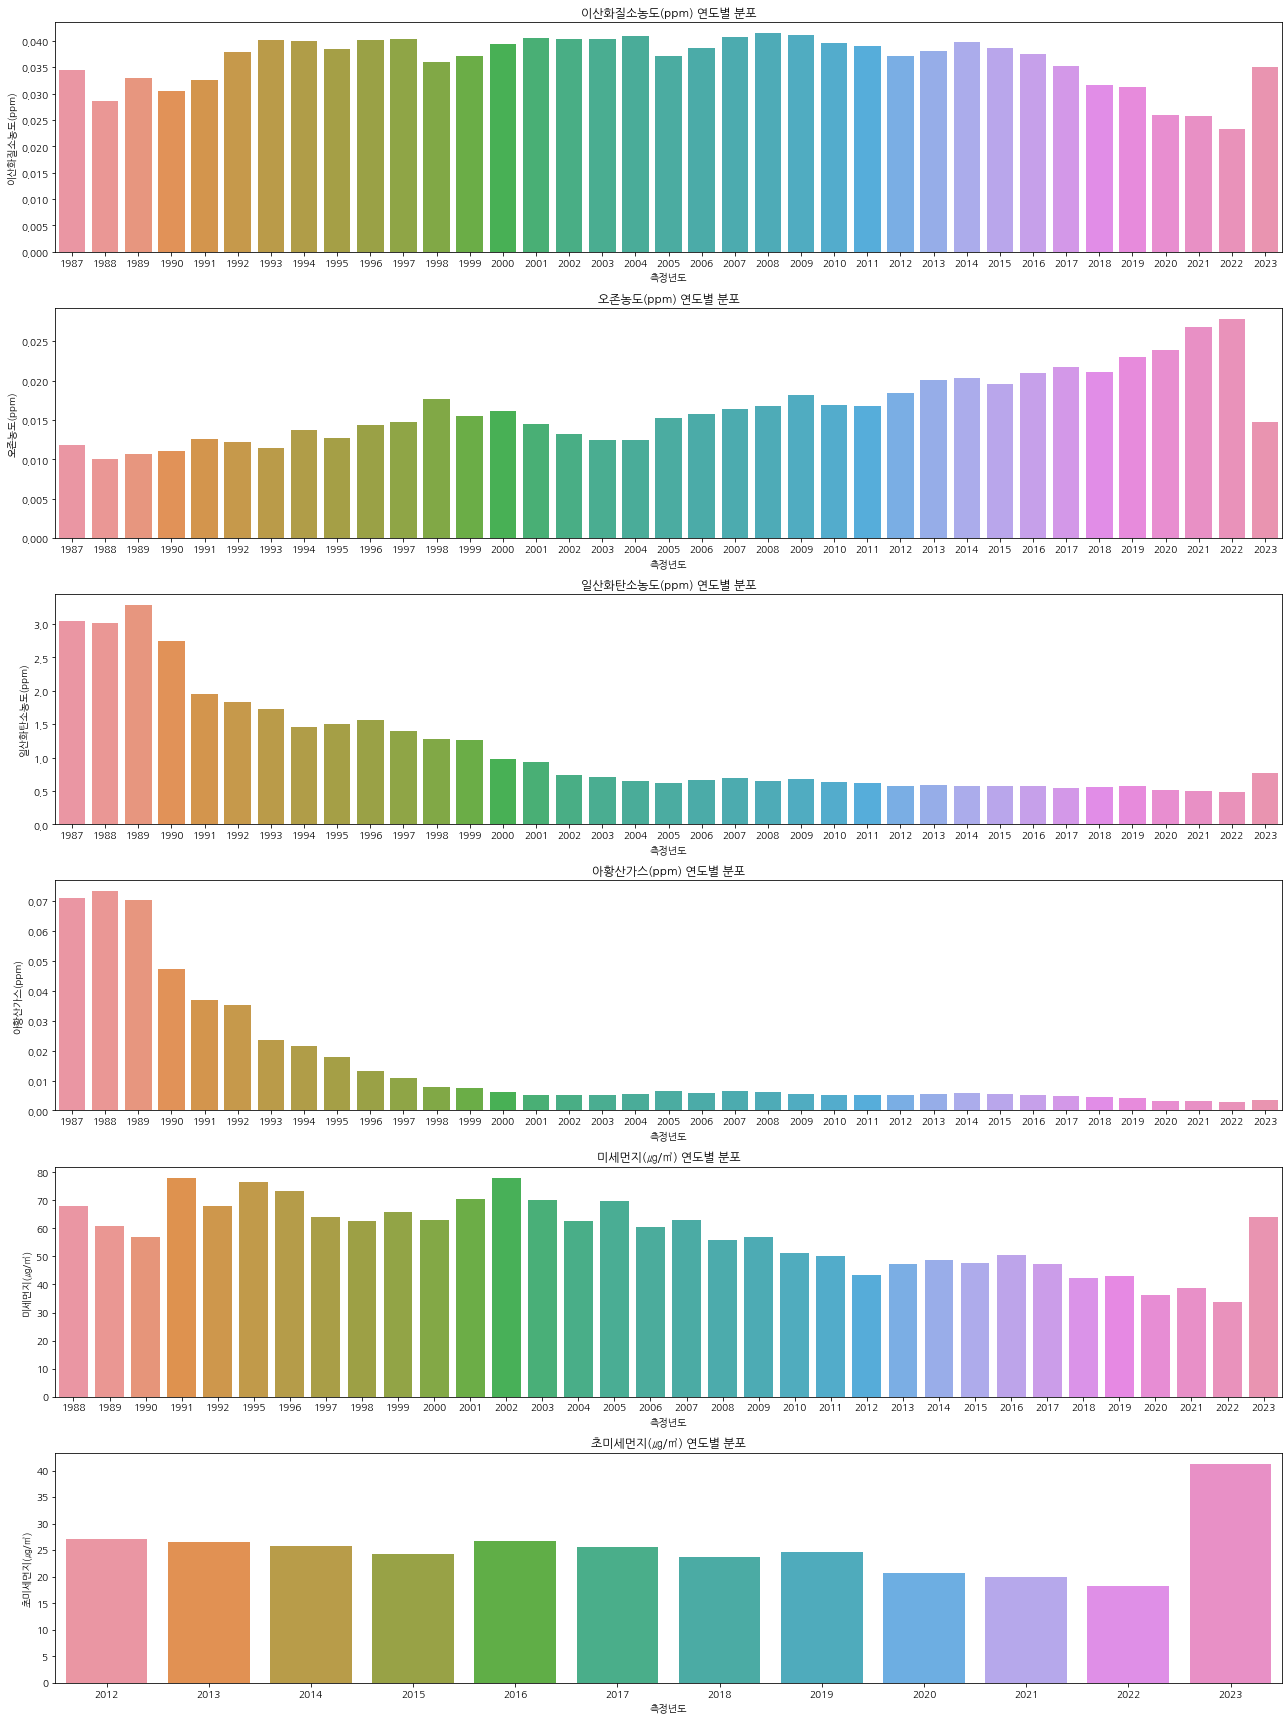

In [18]:
fig,axes = plt.subplots(6,1,figsize=(18,24))
for i,c in enumerate(air_cols):
    sub_df = df[df[c]>0].groupby(['측정년도'],as_index=False)[c].mean()
    sns.barplot(data=sub_df,x='측정년도',y=c,ax=axes[i]).set(title=f'{c} 연도별 분포')
plt.tight_layout()

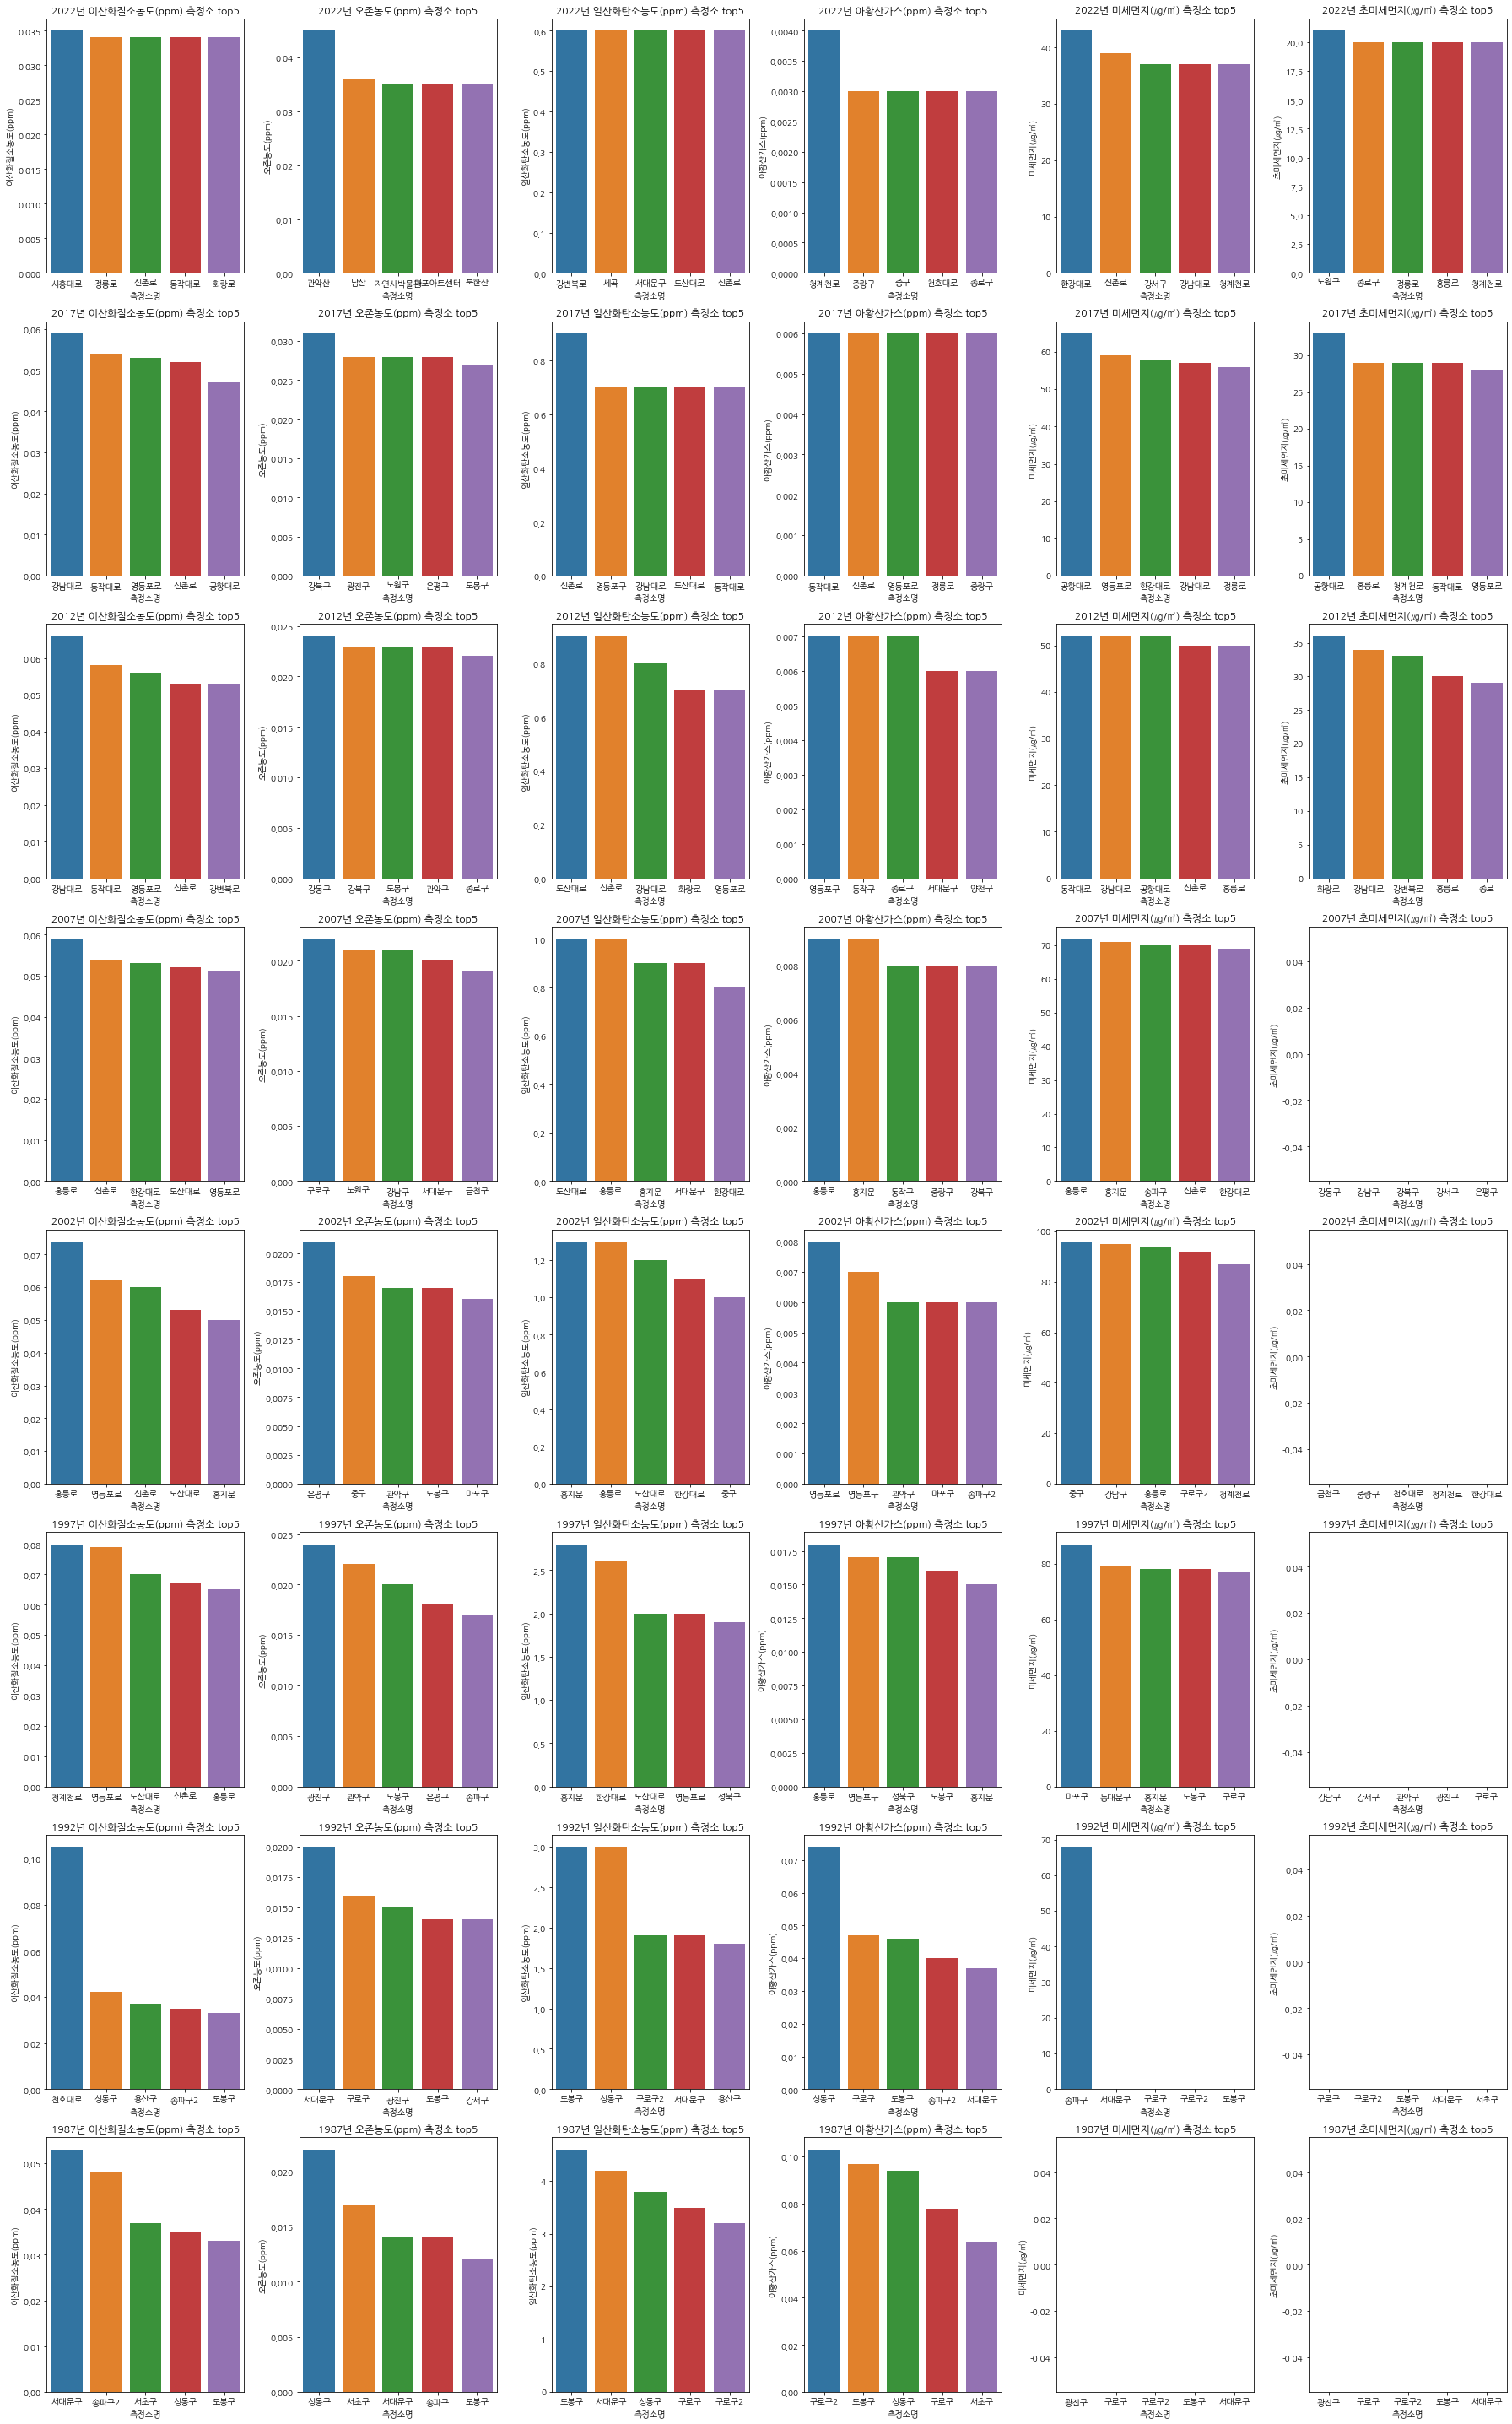

In [38]:
y_cols = df[df['측정년도']%5==2]['측정년도'].unique()
fig,axes = plt.subplots(len(y_cols),6,figsize=(25,len(y_cols)*5))
for i,y in enumerate(y_cols):
    for j,c in enumerate(air_cols):
        sub_df = df.sort_values(c,ascending=False)
        sns.barplot(data=sub_df[sub_df['측정년도']==y].head(),x='측정소명',y=c,ax=axes[i][j]).set(title=f'{y}년 {c} 측정소 top5')
plt.tight_layout()